In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from dython.nominal import associations

from scipy import stats
import scipy as scipy

# READING THE DATASET

In [2]:
Insurance = pd.read_csv('insurance_costs.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Insurance.iloc[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
Insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
Insurance[:5]
print(Insurance[:5])

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [7]:
Insurance.shape

(1338, 7)

In [8]:
Insurance.size

9366

In [9]:
Insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Our dataset has no null/missing values 

In [11]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
Categorical_Col = Insurance.select_dtypes(include = ['object'])
print(f' The dataset contains {len(Categorical_Col.columns.tolist())} categorical values')

 The dataset contains 3 categorical values


In [14]:
for i in Categorical_Col:
    print(i)

sex
smoker
region


In [15]:
for i in Categorical_Col.columns:
    print(f' The unique values in {i} are {Insurance[i].unique()}')

 The unique values in sex are ['female' 'male']
 The unique values in smoker are ['yes' 'no']
 The unique values in region are ['southwest' 'southeast' 'northwest' 'northeast']


In [16]:
Numerical_col = Insurance.select_dtypes(include = ['int64', 'float64'])
print(f' The dataset contains {len(Numerical_col.columns.tolist())} numerical variables')

 The dataset contains 4 numerical variables


In [17]:
for i in Numerical_col:
    print(i)

age
bmi
children
charges


Text(0.5, 1.0, 'Insurance charge distribution')

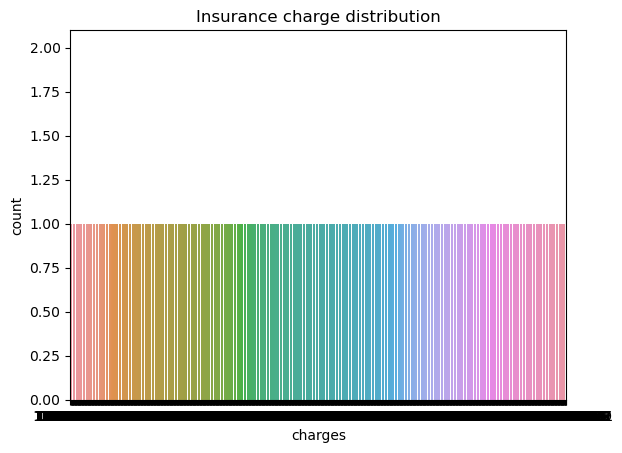

In [18]:
sns.countplot(Insurance, x = 'charges')
plt.title('Insurance charge distribution')

In [19]:
Corr_Matrix = Insurance.corr().round(2)
Corr_Matrix

C:\Users\DELL\AppData\Local\Temp\ipykernel_7180\944432868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix = Insurance.corr().round(2)


,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


C:\Users\DELL\AppData\Local\Temp\ipykernel_7180\2916365400.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = Insurance.corr(method = 'spearman')


<Axes: >

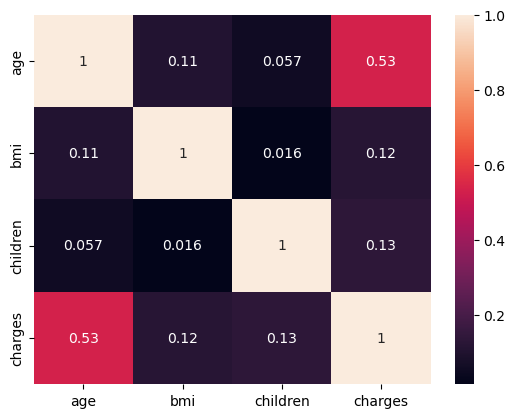

In [20]:
Corr = Insurance.corr(method = 'spearman')
sns.heatmap(Corr, annot = True)

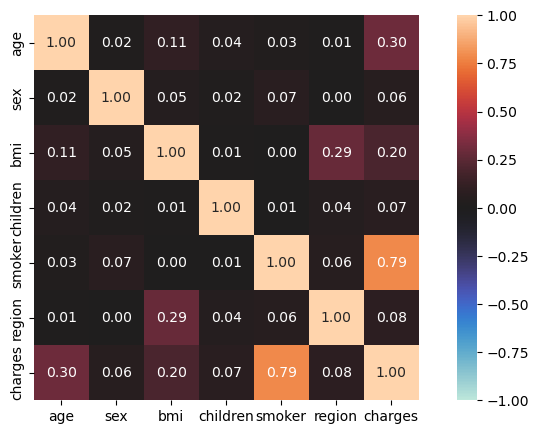

{'corr':                age       sex       bmi  children    smoker    region   charges
 age       1.000000  0.020856  0.109272  0.042469  0.025019  0.013394  0.299008
 sex       0.020856  1.000000  0.046371  0.017163  0.069145  0.000000  0.057292
 bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.285612  0.198341
 children  0.042469  0.017163  0.012759  1.000000  0.007673  0.040137  0.067998
 smoker    0.025019  0.069145  0.003750  0.007673  1.000000  0.056982  0.787251
 region    0.013394  0.000000  0.285612  0.040137  0.056982  1.000000  0.081449
 charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.081449  1.000000,
 'ax': <Axes: >}

In [21]:
associations(Insurance, figsize=(10,5))

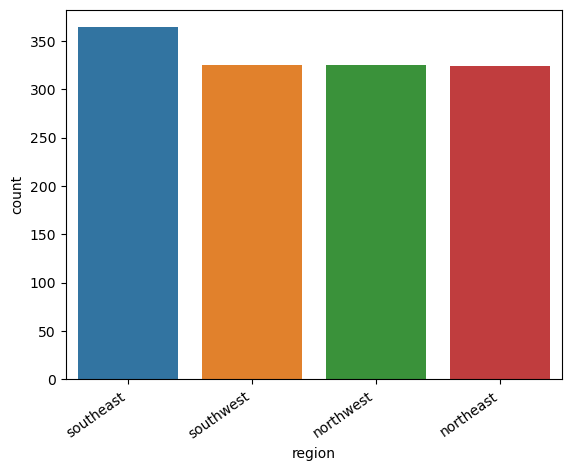

In [22]:
LargSmall = Insurance.groupby('region').size().sort_values().index[::-1]
ax = sns.countplot(Insurance, x = 'region', order = LargSmall)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35, ha = 'right' )
plt.show()

<Axes: xlabel='smoker', ylabel='count'>

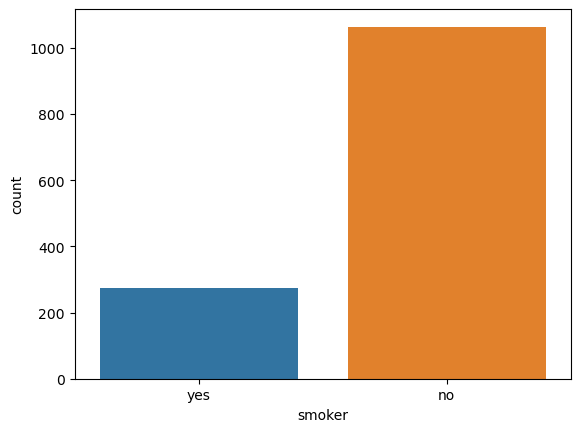

In [23]:
sns.countplot(data = Insurance, x = 'smoker')

<Axes: xlabel='sex', ylabel='count'>

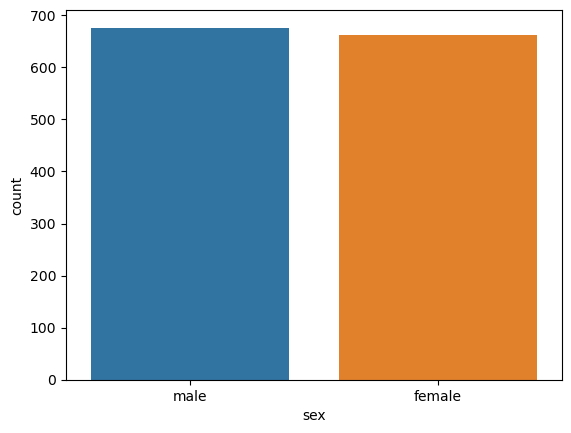

In [24]:
LargeSmall = Insurance.groupby('sex').size().sort_values().index[::-1]
sns.countplot(data = Insurance, x = 'sex', order = LargeSmall)

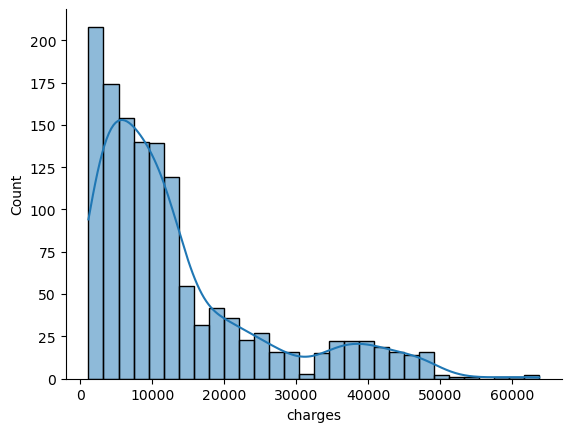

In [25]:
sns.histplot(Insurance.charges, kde = True)
sns.despine()

<Axes: xlabel='charges', ylabel='Count'>

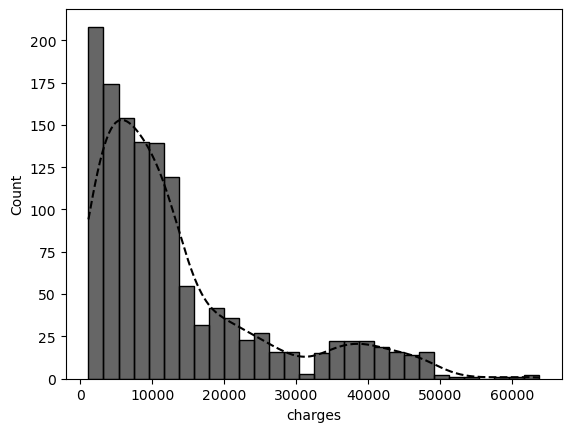

In [26]:
sns.histplot(data=Insurance, x = "charges", color = "black", alpha = 0.6, kde = True, line_kws = {'color':'black','linestyle': 'dashed'})


<Figure size 640x480 with 0 Axes>

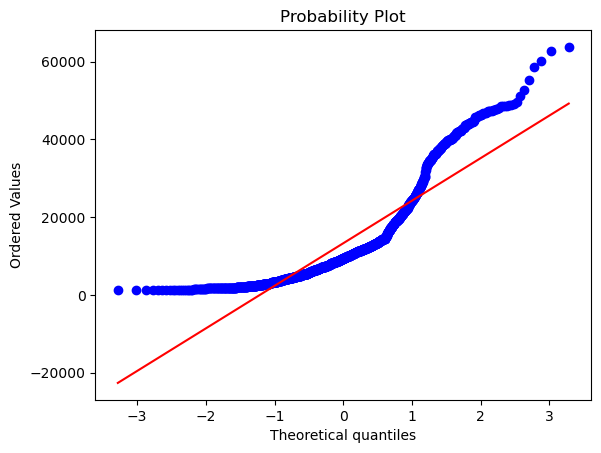

<Figure size 640x480 with 0 Axes>

In [27]:
scipy.stats.probplot(Insurance.charges, plot = plt)
plt.figure()

In [28]:
scipy.stats.shapiro(Insurance.charges)

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

The P-values is greater than alpha value, we accept the null hypothesis iplying our dataset is from a normal distribution.

In [29]:
scipy.stats.bartlett(Insurance.charges, Insurance['age'])

BartlettResult(statistic=16214.480020261326, pvalue=0.0)

The p-value is less than the alpha value (p < 0.05) we accept the alternative hypothesis, implying one of group has different variance compared to the rest

# Scatter Plots

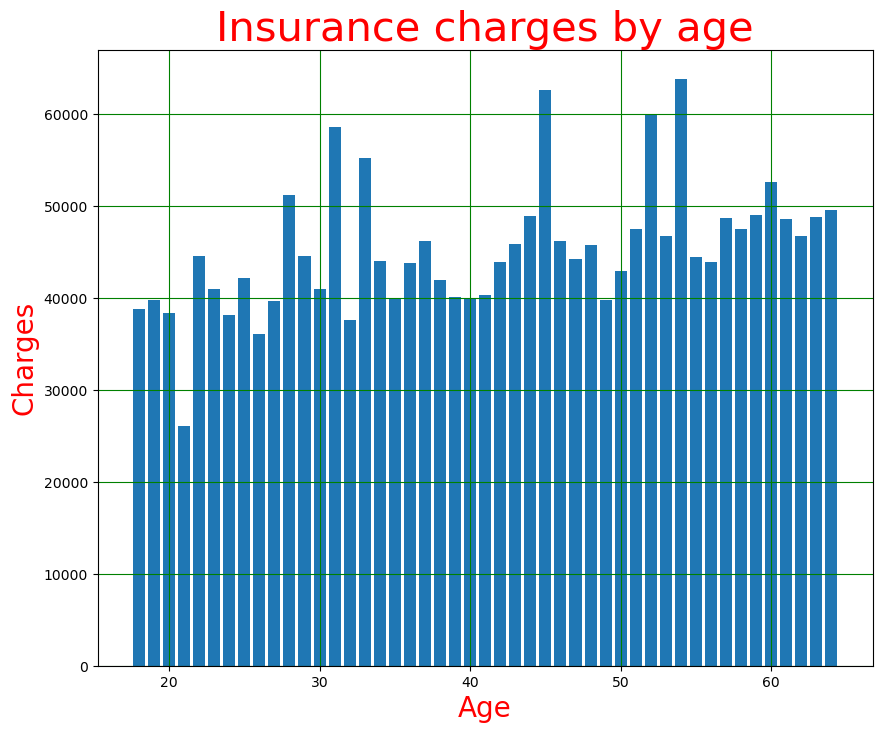

In [32]:
plt.figure(figsize = (10,8))
plt.bar(Insurance['age'], Insurance['charges'])
plt.grid(True, color = 'green')
plt.title('Insurance charges by age', color = 'red', fontdict = {'size': 30})
plt.xlabel('Age', color = 'red', fontdict = {'size': 20})
plt.ylabel('Charges', color = 'red', fontdict = {'size': 20})
plt.savefig('Charges_Vs_age.jpg')
plt.show()

Age is a factor for insurance rates, the older tend to pay higher rates compared to the youngones. The old are highly exposed to health challenges

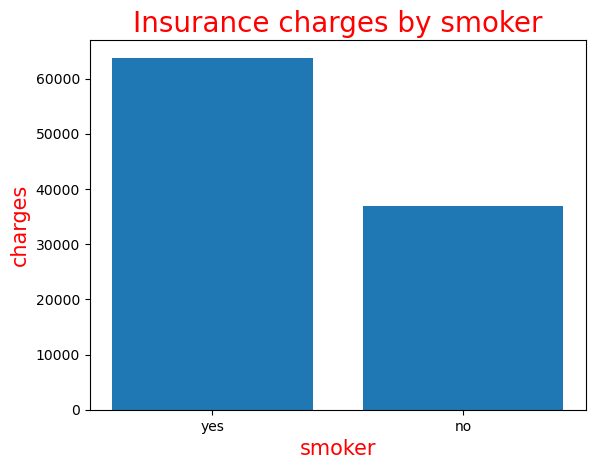

In [35]:
plt.bar(Insurance['smoker'], Insurance['charges'])
plt.title('Insurance charges by smoker', color = 'red', fontdict = {'size': 20})
plt.xlabel('smoker', color = 'red', fontdict = {'size': 15})
plt.ylabel('charges', color = 'red', fontdict = {'size': 15})
plt.savefig('smoker_Vs_Charges.jpg')
plt.show()

Insurances charges for moker is higher than non-smokers. Smokers are more likely to have ongoing health problems and a shorter lifespan than non-smokers, making them more of an insurance risk. As a result, life insurance for smokers comes with higher premiums.

<BarContainer object of 1338 artists>

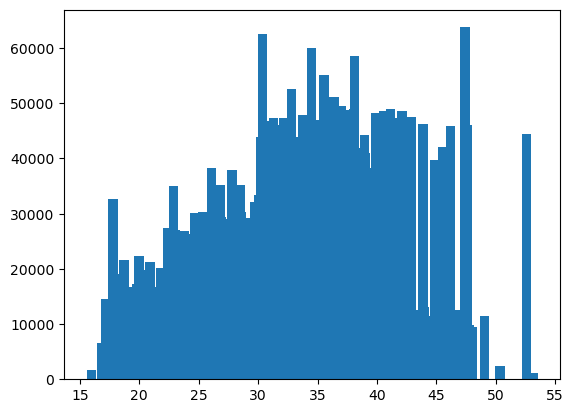

In [39]:
plt.bar(Insurance.bmi, Insurance.charges)